In [144]:
import pandas as pd
import numpy as np
import ot
import matplotlib.pyplot as plt

In [146]:
fjc = pd.read_csv('/Users/shiramichel/Documents/JUSTFAIR/2018_data/FJC_2018.csv')
ussc = pd.read_csv('/Users/shiramichel/Documents/JUSTFAIR/2018_data/mod_ussc_2018.csv')

/var/folders/r7/bqljw8h17hsc6g3m8ck8vhjc0000gn/T/ipykernel_14583/1934528397.py:1: DtypeWarning: Columns (4,11,42,54,65,96,108,113,120,125) have mixed types. Specify dtype option on import or set low_memory=False.
  fjc = pd.read_csv('/Users/shiramichel/Documents/JUSTFAIR/2018_data/FJC_2018.csv')


In [187]:
ussc = ussc[['USSCIDN','SENTMON', 'SENTYR', 'DISTRICT','SENTTOT_new', 'FINE', 'PROBATN', 'floorSENTTOT', 'roundSENTTOT','USSCcode1', 'USSCcode2', 'USSCcode3', 'USSCcode4', 'USSCcode5', 'matchFlag']]
ussc = ussc.rename({'SENTTOT_new': 'PRISTOT', 'FINE': 'FINETOT', 'PROBATN': 'PROBTOT'}, axis=1)
fjc = fjc[['ID','SENTMON', 'SENTYR', 'DISTRICT', 'PRISTOT', 'FINETOT', 'PROBTOT', 'FJDcode1', 'FJDcode2', 'FJDcode3', 'FJDcode4', 'FJDcode5', 'FJDcode6', 'FJDcode7', 'FJDcode8', 'FJDcode9', 'FJDcode10', 'matchFlag']]
fjc.replace(-8, 'NA', inplace=True)
fjc.replace('-8', 'NA', inplace=True)
fjc = fjc

In [188]:
matches = pd.read_csv('/Users/shiramichel/Documents/JUSTFAIR/2018_data/matched_2018.csv')
matches

,ID,SENTMON,SENTYR,DISTRICT,PRISTOT,FINETOT,PROBTOT,FJDcode1,FJDcode2,FJDcode3,...,FJDcode10,USSCIDN,floorSENTTOT,roundSENTTOT,USSCcode1,USSCcode2,USSCcode3,USSCcode4,USSCcode5,DOCKET
0,4450209.0,1,2018,42,10.0,0,0,81324.0,81324.0,NaN,...,NaN,2443270.0,10.0,10.0,81324.0,NaN,NaN,NaN,NaN,1700428.0
1,4462931.0,1,2018,42,0.0,0,36,18641.0,NaN,NaN,...,NaN,2440267.0,NaN,NaN,18641.0,NaN,NaN,NaN,NaN,1700071.0
2,4476567.0,1,2018,51,188.0,0,0,21841.0,21841.0,21841.0,...,NaN,2438619.0,188.0,188.0,21841.0,NaN,NaN,NaN,NaN,1710003.0
3,4445935.0,1,2018,41,20.0,0,0,18922.0,NaN,NaN,...,NaN,2438903.0,20.0,20.0,18922.0,18924.0,NaN,NaN,NaN,1701357.0
4,4446120.0,1,2018,41,20.0,0,0,81324.0,NaN,NaN,...,NaN,2443547.0,20.0,20.0,81324.0,182.0,NaN,NaN,NaN,1701536.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9051,4614269.0,10,2018,14,1.0,0,0,81326.0,NaN,NaN,...,NaN,2497145.0,1.0,2.0,81326.0,NaN,NaN,NaN,NaN,1800273.0
9052,4699529.0,12,2018,50,13.0,0,0,18922.0,NaN,NaN,...,NaN,2510716.0,13.0,14.0,18922.0,NaN,NaN,NaN,NaN,1700164.0
9053,4713229.0,10,2018,61,0.0,0,0,18641.0,42408.0,NaN,...,NaN,2496976.0,0.0,1.0,18641.0,NaN,NaN,NaN,NaN,1850039.0
9054,4724088.0,10,2018,69,0.0,0,0,18661.0,NaN,NaN,...,NaN,2500998.0,0.0,1.0,183146.0,181153.0,18661.0,182.0,NaN,1730108.0


In [189]:
matches_50=matches.sample(50) #taking a sample of 100 to work with
matches_50

,ID,SENTMON,SENTYR,DISTRICT,PRISTOT,FINETOT,PROBTOT,FJDcode1,FJDcode2,FJDcode3,...,FJDcode10,USSCIDN,floorSENTTOT,roundSENTTOT,USSCcode1,USSCcode2,USSCcode3,USSCcode4,USSCcode5,DOCKET
3253,4702826.0,10,2018,52,0.0,0,36,181001.0,181341.0,181341.0,...,181341.0,2496004.0,NaN,NaN,181001.0,NaN,NaN,NaN,NaN,1500399.0
2816,4730047.0,10,2018,70,0.0,0,12,18922.0,NaN,NaN,...,NaN,2496080.0,NaN,NaN,18922.0,18924.0,NaN,NaN,NaN,1800131.0
1659,4472796.0,6,2018,48,37.0,0,0,21846.0,NaN,NaN,...,NaN,2469975.0,37.0,37.0,21846.0,NaN,NaN,NaN,NaN,1600218.0
4150,4731113.0,11,2018,70,0.0,0,36,184.0,NaN,NaN,...,NaN,2504220.0,NaN,NaN,184.0,NaN,NaN,NaN,NaN,1801590.0
2162,4654002.0,10,2018,41,36.0,0,0,81324.0,81324.0,NaN,...,NaN,2495194.0,36.0,36.0,81324.0,81324.0,81324.0,NaN,NaN,1800358.0
2233,4779626.0,10,2018,85,30.0,0,0,182250.0,NaN,NaN,...,NaN,2495876.0,30.0,30.0,182250.0,NaN,NaN,NaN,NaN,1800099.0
5097,4785214.0,11,2018,26,65.0,0,0,21841.0,NaN,NaN,...,NaN,2501937.0,65.0,65.0,21841.0,NaN,NaN,NaN,NaN,1800128.0
4001,4697471.0,10,2018,49,100.0,0,0,21846.0,18924.0,18924.0,...,18922.0,2498953.0,100.0,100.0,21846.0,18922.0,21841.0,18924.0,NaN,1700069.0
2327,4724886.0,10,2018,69,18.0,0,0,18111.0,NaN,NaN,...,NaN,2493416.0,18.0,18.0,18111.0,NaN,NaN,NaN,NaN,1750169.0
6085,4701435.0,11,2018,51,126.0,0,0,18924.0,181951.0,NaN,...,NaN,2505144.0,126.0,126.0,181951.0,18924.0,182.0,NaN,NaN,1720363.0


In [190]:
matches_100=matches.sample(100) #taking a sample of 100 to work with
matches_100

,ID,SENTMON,SENTYR,DISTRICT,PRISTOT,FINETOT,PROBTOT,FJDcode1,FJDcode2,FJDcode3,...,FJDcode10,USSCIDN,floorSENTTOT,roundSENTTOT,USSCcode1,USSCcode2,USSCcode3,USSCcode4,USSCcode5,DOCKET
7702,4717503.0,12,2018,65,54.0,0,0,18922.0,NaN,NaN,...,NaN,2509991.0,54.0,54.0,18922.0,18924.0,NaN,NaN,NaN,1800011.0
4073,4714939.0,10,2018,63,156.0,0,0,21841.0,21841.0,NaN,...,NaN,2499248.0,156.0,156.0,21841.0,21841.0,21841.0,NaN,NaN,1700232.0
6377,4783310.0,12,2018,88,60.0,0,0,18922.0,182252.0,NaN,...,NaN,2507473.0,60.0,60.0,18922.0,NaN,NaN,NaN,NaN,1800268.0
3675,4625476.0,10,2018,17,74.0,0,0,18924.0,18924.0,21841.0,...,NaN,2497562.0,74.0,74.0,21841.0,18922.0,21841.0,18924.0,NaN,1700402.0
4660,4705636.0,11,2018,53,18.0,0,0,181791.0,NaN,NaN,...,NaN,2500736.0,18.0,18.0,181791.0,181791.0,NaN,NaN,NaN,1810025.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595,4737000.0,10,2018,71,0.0,0,60,21841.0,18922.0,NaN,...,NaN,2497090.0,NaN,NaN,18922.0,21841.0,21841.0,NaN,NaN,1600514.0
8502,4380578.0,3,2018,7,0.0,0,0,181951.0,NaN,NaN,...,NaN,2467790.0,0.0,0.0,181951.0,18924.0,18922.0,18924.0,18924.0,1100639.0
3255,4683440.0,10,2018,42,46.0,0,0,182113.0,NaN,NaN,...,NaN,2498146.0,46.0,46.0,182113.0,182.0,NaN,NaN,NaN,1800127.0
8815,4641991.0,10,2018,38,0.0,0,0,81326.0,NaN,NaN,...,NaN,2499958.0,0.0,0.0,81326.0,NaN,NaN,NaN,NaN,1800024.0


In [191]:
fjc_50_vals= matches_50.ID
ussc_50_vals=matches_50.USSCIDN

In [192]:
fjc_vals= matches_100.ID
ussc_vals=matches_100.USSCIDN

In [193]:
matches_50_df = matches_50[['ID', 'USSCIDN' ]]

In [194]:
matches_100_df = matches_100[['ID', 'USSCIDN' ]]

In [195]:
ussc_25 = pd.merge(matches_50_df, ussc, on=['USSCIDN'])
ussc_25=ussc_25.drop(['ID'], axis=1)
ussc_25

,USSCIDN,SENTMON,SENTYR,DISTRICT,PRISTOT,FINETOT,PROBTOT,floorSENTTOT,roundSENTTOT,USSCcode1,USSCcode2,USSCcode3,USSCcode4,USSCcode5,matchFlag
0,2496004.0,10,2018,52,0.0,0,36,NaN,NaN,181001.0,NaN,NaN,NaN,NaN,1
1,2496080.0,10,2018,70,0.0,0,12,NaN,NaN,18922.0,18924.0,NaN,NaN,NaN,1
2,2469975.0,6,2018,48,37.0,0,0,37.0,37.0,21846.0,NaN,NaN,NaN,NaN,1
3,2504220.0,11,2018,70,0.0,0,36,NaN,NaN,184.0,NaN,NaN,NaN,NaN,1
4,2495194.0,10,2018,41,36.0,0,0,36.0,36.0,81324.0,81324.0,81324.0,NaN,NaN,1
5,2495876.0,10,2018,85,30.0,0,0,30.0,30.0,182250.0,NaN,NaN,NaN,NaN,1
6,2501937.0,11,2018,26,65.0,0,0,65.0,65.0,21841.0,NaN,NaN,NaN,NaN,1
7,2498953.0,10,2018,49,100.0,0,0,100.0,100.0,21846.0,18922.0,21841.0,18924.0,NaN,1
8,2493416.0,10,2018,69,18.0,0,0,18.0,18.0,18111.0,NaN,NaN,NaN,NaN,1
9,2505144.0,11,2018,51,126.0,0,0,126.0,126.0,181951.0,18924.0,182.0,NaN,NaN,1


In [196]:
ussc_50 = pd.merge(matches_100_df, ussc, on=['USSCIDN'])
ussc_50=ussc_50.drop(['ID'], axis=1)
ussc_50

,USSCIDN,SENTMON,SENTYR,DISTRICT,PRISTOT,FINETOT,PROBTOT,floorSENTTOT,roundSENTTOT,USSCcode1,USSCcode2,USSCcode3,USSCcode4,USSCcode5,matchFlag
0,2509991.0,12,2018,65,54.00,0,0,54.0,54.0,18922.0,18924.0,NaN,NaN,NaN,1
1,2499248.0,10,2018,63,156.00,0,0,156.0,156.0,21841.0,21841.0,21841.0,NaN,NaN,1
2,2507473.0,12,2018,88,60.00,0,0,60.0,60.0,18922.0,NaN,NaN,NaN,NaN,1
3,2497562.0,10,2018,17,74.00,0,0,74.0,74.0,21841.0,18922.0,21841.0,18924.0,NaN,1
4,2500736.0,11,2018,53,18.00,0,0,18.0,18.0,181791.0,181791.0,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2497090.0,10,2018,71,0.00,0,60,NaN,NaN,18922.0,21841.0,21841.0,NaN,NaN,1
96,2467790.0,3,2018,7,0.03,0,0,0.0,0.0,181951.0,18924.0,18922.0,18924.0,18924.0,1
97,2498146.0,10,2018,42,46.00,0,0,46.0,46.0,182113.0,182.0,NaN,NaN,NaN,1
98,2499958.0,10,2018,38,0.03,0,0,0.0,0.0,81326.0,NaN,NaN,NaN,NaN,1


In [197]:
fjc_25 = pd.merge(matches_50_df, fjc, on=['ID'])
fjc_25=fjc_25.drop(['USSCIDN'], axis=1)
fjc_25

,ID,SENTMON,SENTYR,DISTRICT,PRISTOT,FINETOT,PROBTOT,FJDcode1,FJDcode2,FJDcode3,FJDcode4,FJDcode5,FJDcode6,FJDcode7,FJDcode8,FJDcode9,FJDcode10,matchFlag
0,4702826.0,10,2018,52,0.0,0,36,181001,181341,181341,181343,181014,181001,181343,181341,181343,181341,1
1,4730047.0,10,2018,70,0.0,0,12,18922,NA,NA,NA,NA,18922,NA,NA,NA,NA,1
2,4472796.0,6,2018,48,37.0,0,0,21846,NA,NA,NA,NA,21846,NA,NA,NA,NA,1
3,4731113.0,11,2018,70,0.0,0,36,184,NA,NA,NA,NA,184,NA,NA,NA,NA,1
4,4654002.0,10,2018,41,36.0,0,0,81324,81324,NA,NA,NA,81324,81324,NA,NA,NA,1
5,4779626.0,10,2018,85,30.0,0,0,182250,NA,NA,NA,NA,182250,NA,NA,NA,NA,1
6,4785214.0,11,2018,26,65.0,0,0,21841,NA,NA,NA,NA,21841,NA,NA,NA,NA,1
7,4697471.0,10,2018,49,100.0,0,0,21846,18924,18924,21841,18922,21846,18922,18924,21841,18922,1
8,4724886.0,10,2018,69,18.0,0,0,18111,NA,NA,NA,NA,18111,NA,NA,NA,NA,1
9,4701435.0,11,2018,51,126.0,0,0,18924,181951,NA,NA,NA,18924,181951,NA,NA,NA,1


In [198]:
fjc_50 = pd.merge(matches_100_df, fjc, on=['ID'])
fjc_50=fjc_50.drop(['USSCIDN'], axis=1)
fjc_50

,ID,SENTMON,SENTYR,DISTRICT,PRISTOT,FINETOT,PROBTOT,FJDcode1,FJDcode2,FJDcode3,FJDcode4,FJDcode5,FJDcode6,FJDcode7,FJDcode8,FJDcode9,FJDcode10,matchFlag
0,4717503.0,12,2018,65,54.0,0,0,18922,NA,NA,NA,NA,18922,NA,NA,NA,NA,1
1,4714939.0,10,2018,63,156.0,0,0,21841,21841,NA,NA,NA,21841,21841,NA,NA,NA,1
2,4783310.0,12,2018,88,60.0,0,0,18922,182252,NA,NA,NA,18922,182252,NA,NA,NA,1
3,4625476.0,10,2018,17,74.0,0,0,18924,18924,21841,NA,NA,18924,21841,18924,NA,NA,1
4,4705636.0,11,2018,53,18.0,0,0,181791,NA,NA,NA,NA,181791,NA,NA,NA,NA,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,4737000.0,10,2018,71,0.0,0,60,21841,18922,NA,NA,NA,21841,18922,NA,NA,NA,1
96,4380578.0,3,2018,7,0.0,0,0,181951,NA,NA,NA,NA,181951,NA,NA,NA,NA,1
97,4683440.0,10,2018,42,46.0,0,0,182113,NA,NA,NA,NA,182113,NA,NA,NA,NA,1
98,4641991.0,10,2018,38,0.0,0,0,81326,NA,NA,NA,NA,81326,NA,NA,NA,NA,1


In [199]:
ussc_25.reset_index(drop=True, inplace=True)
fjc_25.reset_index(drop=True, inplace=True)
ussc_25 = ussc_50.iloc[0:25,:]
fjc_25 = fjc_50.iloc[0:25,:]

In [200]:
ussc_50.reset_index(drop=True, inplace=True)
fjc_50.reset_index(drop=True, inplace=True)
ussc_50 = ussc_50.iloc[0:50,:]
fjc_50 = fjc_50.iloc[0:50,:]

In [201]:
ussc_25

,USSCIDN,SENTMON,SENTYR,DISTRICT,PRISTOT,FINETOT,PROBTOT,floorSENTTOT,roundSENTTOT,USSCcode1,USSCcode2,USSCcode3,USSCcode4,USSCcode5,matchFlag
0,2509991.0,12,2018,65,54.00,0,0,54.0,54.0,18922.0,18924.0,NaN,NaN,NaN,1
1,2499248.0,10,2018,63,156.00,0,0,156.0,156.0,21841.0,21841.0,21841.0,NaN,NaN,1
2,2507473.0,12,2018,88,60.00,0,0,60.0,60.0,18922.0,NaN,NaN,NaN,NaN,1
3,2497562.0,10,2018,17,74.00,0,0,74.0,74.0,21841.0,18922.0,21841.0,18924.0,NaN,1
4,2500736.0,11,2018,53,18.00,0,0,18.0,18.0,181791.0,181791.0,NaN,NaN,NaN,1
5,2519259.0,12,2018,96,24.00,10000,0,24.0,24.0,18922.0,NaN,NaN,NaN,NaN,1
6,2470204.0,6,2018,70,15.00,0,0,15.0,15.0,81324.0,81324.0,81324.0,NaN,NaN,1
7,2476788.0,7,2018,73,24.00,0,0,24.0,24.0,81326.0,81326.0,NaN,NaN,NaN,1
8,2493396.0,10,2018,14,151.00,0,0,151.0,151.0,21846.0,21841.0,NaN,NaN,NaN,1
9,2506333.0,12,2018,77,22.00,0,0,22.0,22.0,18922.0,18924.0,NaN,NaN,NaN,1


In [202]:
fjc_25

,ID,SENTMON,SENTYR,DISTRICT,PRISTOT,FINETOT,PROBTOT,FJDcode1,FJDcode2,FJDcode3,FJDcode4,FJDcode5,FJDcode6,FJDcode7,FJDcode8,FJDcode9,FJDcode10,matchFlag
0,4717503.0,12,2018,65,54.0,0,0,18922,NA,NA,NA,NA,18922,NA,NA,NA,NA,1
1,4714939.0,10,2018,63,156.0,0,0,21841,21841,NA,NA,NA,21841,21841,NA,NA,NA,1
2,4783310.0,12,2018,88,60.0,0,0,18922,182252,NA,NA,NA,18922,182252,NA,NA,NA,1
3,4625476.0,10,2018,17,74.0,0,0,18924,18924,21841,NA,NA,18924,21841,18924,NA,NA,1
4,4705636.0,11,2018,53,18.0,0,0,181791,NA,NA,NA,NA,181791,NA,NA,NA,NA,1
5,4648082.0,12,2018,96,24.0,10000,0,18922,NA,NA,NA,NA,18922,NA,NA,NA,NA,1
6,4506527.0,6,2018,70,15.0,0,0,81324,NA,NA,NA,NA,81324,NA,NA,NA,NA,1
7,4518052.0,7,2018,73,24.0,0,0,81326,NA,NA,NA,NA,81326,NA,NA,NA,NA,1
8,4613190.0,10,2018,14,151.0,0,0,21846,21841,21841,21841,21841,21846,21841,21841,21841,21841,1
9,4761104.0,12,2018,77,22.0,0,0,18922,NA,NA,NA,NA,18922,NA,NA,NA,NA,1


In [203]:
ussc_50

,USSCIDN,SENTMON,SENTYR,DISTRICT,PRISTOT,FINETOT,PROBTOT,floorSENTTOT,roundSENTTOT,USSCcode1,USSCcode2,USSCcode3,USSCcode4,USSCcode5,matchFlag
0,2509991.0,12,2018,65,54.00,0,0,54.0,54.0,18922.0,18924.0,NaN,NaN,NaN,1
1,2499248.0,10,2018,63,156.00,0,0,156.0,156.0,21841.0,21841.0,21841.0,NaN,NaN,1
2,2507473.0,12,2018,88,60.00,0,0,60.0,60.0,18922.0,NaN,NaN,NaN,NaN,1
3,2497562.0,10,2018,17,74.00,0,0,74.0,74.0,21841.0,18922.0,21841.0,18924.0,NaN,1
4,2500736.0,11,2018,53,18.00,0,0,18.0,18.0,181791.0,181791.0,NaN,NaN,NaN,1
5,2519259.0,12,2018,96,24.00,10000,0,24.0,24.0,18922.0,NaN,NaN,NaN,NaN,1
6,2470204.0,6,2018,70,15.00,0,0,15.0,15.0,81324.0,81324.0,81324.0,NaN,NaN,1
7,2476788.0,7,2018,73,24.00,0,0,24.0,24.0,81326.0,81326.0,NaN,NaN,NaN,1
8,2493396.0,10,2018,14,151.00,0,0,151.0,151.0,21846.0,21841.0,NaN,NaN,NaN,1
9,2506333.0,12,2018,77,22.00,0,0,22.0,22.0,18922.0,18924.0,NaN,NaN,NaN,1


In [204]:
fjc_50

,ID,SENTMON,SENTYR,DISTRICT,PRISTOT,FINETOT,PROBTOT,FJDcode1,FJDcode2,FJDcode3,FJDcode4,FJDcode5,FJDcode6,FJDcode7,FJDcode8,FJDcode9,FJDcode10,matchFlag
0,4717503.0,12,2018,65,54.0,0,0,18922,NA,NA,NA,NA,18922,NA,NA,NA,NA,1
1,4714939.0,10,2018,63,156.0,0,0,21841,21841,NA,NA,NA,21841,21841,NA,NA,NA,1
2,4783310.0,12,2018,88,60.0,0,0,18922,182252,NA,NA,NA,18922,182252,NA,NA,NA,1
3,4625476.0,10,2018,17,74.0,0,0,18924,18924,21841,NA,NA,18924,21841,18924,NA,NA,1
4,4705636.0,11,2018,53,18.0,0,0,181791,NA,NA,NA,NA,181791,NA,NA,NA,NA,1
5,4648082.0,12,2018,96,24.0,10000,0,18922,NA,NA,NA,NA,18922,NA,NA,NA,NA,1
6,4506527.0,6,2018,70,15.0,0,0,81324,NA,NA,NA,NA,81324,NA,NA,NA,NA,1
7,4518052.0,7,2018,73,24.0,0,0,81326,NA,NA,NA,NA,81326,NA,NA,NA,NA,1
8,4613190.0,10,2018,14,151.0,0,0,21846,21841,21841,21841,21841,21846,21841,21841,21841,21841,1
9,4761104.0,12,2018,77,22.0,0,0,18922,NA,NA,NA,NA,18922,NA,NA,NA,NA,1


In [205]:
cost_matrix_25 = np.zeros((25,25))

for i in range (25):
    for j in range(25):
        value=0
        for x in range(1,7):
            if ussc_25.iloc[i,x] != fjc_25.iloc[j,x]:
                value=value+1
        new_value=1
        for k in range(9,14):
            if ussc_25.iloc[i,k] == fjc_25.iloc[j,7] or ussc_25.iloc[i,k]== fjc_25.iloc[j,8] or ussc_25.iloc[i,k]== fjc_25.iloc[j,9] or ussc_25.iloc[i,k]== fjc_25.iloc[i,10] or ussc_25.iloc[i,k]== fjc_25.iloc[j,11] or ussc_25.iloc[i,k]== fjc_25.iloc[j,12] or ussc_25.iloc[i,k]== fjc_25.iloc[j,13] or ussc_25.iloc[i,k]== fjc_25.iloc[j,14] or ussc_25.iloc[i,k]== fjc_25.iloc[j,15] or ussc_25.iloc[i,k]== fjc_25.iloc[j,16]:
                new_value=new_value-0.2
        cost_matrix_25[i][j] = value + new_value

cost_matrix_25

array([[0.8, 4. , 2.8, 3.8, 4. , 3.8, 4. , 4. , 4. , 2.8, 4. , 4. , 4. ,
        5. , 3.8, 4. , 4. , 3. , 4. , 5. , 3.6, 2.8, 3.8, 4. , 4. ],
       [4. , 0.4, 4. , 2.4, 4. , 5. , 4. , 4. , 2.4, 4. , 4. , 4. , 3.4,
        4. , 4. , 3. , 4. , 3.4, 2.4, 5. , 4. , 2.4, 3.4, 4. , 3. ],
       [2.8, 4. , 0.8, 4. , 4. , 3.8, 4. , 4. , 4. , 2.8, 4. , 4. , 4. ,
        5. , 3.8, 4. , 4. , 3. , 4. , 5. , 3.8, 2.8, 4. , 4. , 4. ],
       [3.8, 2.6, 3.8, 0.4, 4. , 4.8, 4. , 4. , 2.6, 3.8, 4. , 4. , 3.6,
        5. , 3.8, 3. , 4. , 3.6, 2.6, 5. , 3.6, 3.4, 3.4, 4. , 3. ],
       [4. , 4. , 4. , 4. , 0.6, 5. , 4. , 4. , 4. , 4. , 4. , 3. , 3. ,
        4. , 3. , 4. , 4. , 4. , 4. , 5. , 4. , 4. , 3. , 3. , 4. ],
       [3.8, 5. , 3.8, 5. , 5. , 0.8, 5. , 4. , 5. , 3.8, 5. , 5. , 5. ,
        6. , 4.8, 5. , 5. , 4. , 5. , 6. , 4.8, 3.8, 5. , 5. , 5. ],
       [4. , 4. , 4. , 4. , 4. , 5. , 0.4, 4. , 4. , 4. , 4. , 3. , 4. ,
        5. , 4. , 4. , 4. , 4. , 4. , 5. , 2. , 4. , 4. , 4. , 4. ],
      

In [206]:
cost_matrix = np.zeros((50,50))

for i in range (50):
    for j in range(50):
        value=0
        for x in range(1,7):
            if ussc_50.iloc[i,x] != fjc_50.iloc[j,x]:
                value=value+1
        new_value=1
        for k in range(9,14):
            if ussc_50.iloc[i,k] == fjc_50.iloc[j,7] or ussc_50.iloc[i,k]== fjc_50.iloc[j,8] or ussc_50.iloc[i,k]== fjc_50.iloc[j,9] or ussc_50.iloc[i,k]== fjc_50.iloc[i,10] or ussc_50.iloc[i,k]== fjc_50.iloc[j,11] or ussc_50.iloc[i,k]== fjc_50.iloc[j,12] or ussc_50.iloc[i,k]== fjc_50.iloc[j,13] or ussc_50.iloc[i,k]== fjc_50.iloc[j,14] or ussc_50.iloc[i,k]== fjc_50.iloc[j,15] or ussc_50.iloc[i,k]== fjc_50.iloc[j,16]:
                new_value=new_value-0.2
        cost_matrix[i][j] = value + new_value

cost_matrix

array([[0.8, 4. , 2.8, ..., 5. , 3. , 6. ],
       [4. , 0.4, 4. , ..., 5. , 4. , 5.4],
       [2.8, 4. , 0.8, ..., 5. , 3. , 6. ],
       ...,
       [5. , 5. , 5. , ..., 0.8, 5. , 5. ],
       [3. , 4. , 3. , ..., 5. , 0.8, 6. ],
       [6. , 5.8, 6. , ..., 4.8, 6. , 0.6]])

In [207]:
a = np.ones(25)
b= np.ones(25)
M= cost_matrix_25

S_25 = ot.emd(a,b,M)
S_25

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 

In [208]:
a = np.ones(50)
b= np.ones(50)
M= cost_matrix

S = ot.emd(a,b,M)
S

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [209]:
# lambda = 2 * 10^-1
a = np.ones(25)
b= np.ones(25)
M = cost_matrix_25
lambd = 2e-1
e1_25 = ot.sinkhorn(a, b, M, lambd, verbose=True)
np.max(S_25-e1_25)

It.  |Err         
-------------------
    0|8.708650e-02|
   10|4.237986e-02|
   20|2.811982e-02|
   30|2.107410e-02|
   40|1.686439e-02|
   50|1.406161e-02|
   60|1.205960e-02|
   70|1.055700e-02|
   80|9.386975e-03|
   90|8.449638e-03|
  100|7.681507e-03|
  110|7.040298e-03|
  120|6.496753e-03|
  130|6.029983e-03|
  140|5.624671e-03|
  150|5.269332e-03|
  160|4.955184e-03|
  170|4.675396e-03|
  180|4.424579e-03|
  190|4.198419e-03|
It.  |Err         
-------------------
  200|3.993425e-03|
  210|3.806741e-03|
  220|3.636007e-03|
  230|3.479259e-03|
  240|3.334844e-03|
  250|3.201364e-03|
  260|3.077631e-03|
  270|2.962622e-03|
  280|2.855458e-03|
  290|2.755376e-03|
  300|2.661711e-03|
  310|2.573880e-03|
  320|2.491372e-03|
  330|2.413735e-03|
  340|2.340568e-03|
  350|2.271512e-03|
  360|2.206251e-03|
  370|2.144497e-03|
  380|2.085994e-03|
  390|2.030509e-03|
It.  |Err         
-------------------
  400|1.977833e-03|
  410|1.927775e-03|
  420|1.880163e-03|
  430|1.834837e-03|
  4

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/ot/bregman.py:517: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "


0.0010671690363235342

In [210]:
# lambda = 2 * 10^-1
a = np.ones(50)
b= np.ones(50)
M = cost_matrix
lambd = 2e-1
e1 = ot.sinkhorn(a, b, M, lambd, verbose=True)
np.max(S-e1)

It.  |Err         
-------------------
    0|1.045644e-01|
   10|4.964699e-02|
   20|3.355693e-02|
   30|2.582005e-02|
   40|2.123660e-02|
   50|1.818135e-02|
   60|1.598285e-02|
   70|1.431345e-02|
   80|1.299432e-02|
   90|1.191965e-02|
  100|1.102285e-02|
  110|1.025992e-02|
  120|9.600613e-03|
  130|9.023438e-03|
  140|8.512677e-03|
  150|8.056554e-03|
  160|7.646055e-03|
  170|7.274155e-03|
  180|6.935281e-03|
  190|6.624951e-03|
It.  |Err         
-------------------
  200|6.339511e-03|
  210|6.075947e-03|
  220|5.831746e-03|
  230|5.604794e-03|
  240|5.393295e-03|
  250|5.195712e-03|
  260|5.010720e-03|
  270|4.837171e-03|
  280|4.674060e-03|
  290|4.520506e-03|
  300|4.375730e-03|
  310|4.239043e-03|
  320|4.109828e-03|
  330|3.987534e-03|
  340|3.871668e-03|
  350|3.761780e-03|
  360|3.657468e-03|
  370|3.558364e-03|
  380|3.464131e-03|
  390|3.374464e-03|
It.  |Err         
-------------------
  400|3.289081e-03|
  410|3.207725e-03|
  420|3.130157e-03|
  430|3.056155e-03|
  4

0.0036261668371810885

In [211]:
# lambda = 2 * 10^-2
a = np.ones(25)
b= np.ones(25)
M = cost_matrix_25
lambd = 2e-2
e2_25 = ot.sinkhorn(a, b, M, lambd, verbose=True)
np.max(S_25-e2_25)

9.348077867343818e-14

In [212]:
# lambda = 2 * 10^-2
a = np.ones(50)
b= np.ones(50)
M = cost_matrix
lambd = 2e-2
e2 = ot.sinkhorn(a, b, M, lambd, verbose=True)
np.max(S-e2)

9.348077867343818e-14

In [213]:
# lambda = 2 * 10^-3
a = np.ones(25)
b= np.ones(25)
M = cost_matrix_25
lambd = 2e-3
e3_25 = ot.sinkhorn(a, b, M, lambd, verbose=True)
np.max(S_25-e3_25)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/ot/bregman.py:484: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/ot/bregman.py:492: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)


1.0

In [214]:
# lambda = 2 * 10^-3
a = np.ones(50)
b= np.ones(50)
M = cost_matrix
lambd = 2e-3
e3 = ot.sinkhorn(a, b, M, lambd, verbose=True)
np.max(S-e3)

1.0

In [215]:
# lambda = 2 * 10^-4
a = np.ones(25)
b= np.ones(25)
M = cost_matrix_25
lambd = 2e-4
e4_25 = ot.sinkhorn(a, b, M, lambd, verbose=True)
np.max(S_25-e4_25)

1.0

In [216]:
# lambda = 2 * 10^-4
a = np.ones(50)
b= np.ones(50)
M = cost_matrix
lambd = 2e-4
e4 = ot.sinkhorn(a, b, M, lambd, verbose=True)
np.max(S-e4)

1.0

In [217]:
# lambda = 2 * 10^-5
a = np.ones(25)
b= np.ones(25)
M = cost_matrix_25
lambd = 2e-5
e5_25 = ot.sinkhorn(a, b, M, lambd, verbose=True)
np.max(S_25-e5_25)

1.0

In [218]:
# lambda = 2 * 10^-5
a = np.ones(50)
b= np.ones(50)
M = cost_matrix
lambd = 2e-5
e5 = ot.sinkhorn(a, b, M, lambd, verbose=True)
np.max(S-e5)

1.0

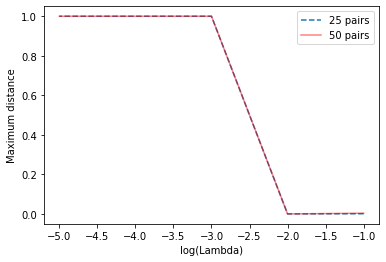

In [219]:
y_50 = np.array([np.max(S-e1), np.max(S-e2), np.max(S-e3), np.max(S-e4), np.max(S-e5)])
y_25 = np.array([np.max(S_25-e1_25), np.max(S_25-e2_25), np.max(S_25-e3_25), np.max(S_25-e4_25), np.max(S_25-e5_25)])

x = np.array([-1,-2,-3,-4,-5])

plt.plot(x,y_25, label='25 pairs', linestyle='dashed')
plt.plot(x,y_50, label='50 pairs', alpha=0.5, color='red')

plt.ylabel('Maximum distance')
plt.xlabel('log(Lambda)')

plt.legend()
plt.show()

In [220]:
unmatch = pd.read_csv('/Users/shiramichel/Documents/JUSTFAIR/2018_data/unmatched_2018.csv')

In [221]:
fjc = pd.read_csv('/Users/shiramichel/Documents/JUSTFAIR/2018_data/FJC_2018.csv')
ussc = pd.read_csv('/Users/shiramichel/Documents/JUSTFAIR/2018_data/mod_ussc_2018.csv')
matched_2018 = matches

/var/folders/r7/bqljw8h17hsc6g3m8ck8vhjc0000gn/T/ipykernel_14583/792254687.py:1: DtypeWarning: Columns (4,11,42,54,65,96,108,113,120,125) have mixed types. Specify dtype option on import or set low_memory=False.
  fjc = pd.read_csv('/Users/shiramichel/Documents/JUSTFAIR/2018_data/FJC_2018.csv')


In [222]:
fjc['matchFlag'] = fjc.ID.isin(matched_2018.ID).astype(int)
ussc['matchFlag'] = ussc.USSCIDN.isin(matched_2018.USSCIDN).astype(int)

In [223]:
fjc_unmatch = fjc[fjc['matchFlag'] == 0].sample(5)
fjc_unmatch

,ID,FISCALYR,CIRCUIT,DISTRICT,OFFICE,DOCKET,DEFNO,CTDEF,NAME,REOPSEQ,...,FJDcode2,FJDcode3,FJDcode4,FJDcode5,FJDcode6,FJDcode7,FJDcode8,FJDcode9,FJDcode10,matchFlag
26283,4471426,2018,6,47,3,1700539,1,1,NaN,0,...,-8,-8,-8,-8,81326,-8,-8,-8,-8,0
20784,4456139,2018,5,42,3,1800171,1,1,NaN,0,...,-8,-8,-8,-8,81326,-8,-8,-8,-8,0
3003,4384456,2018,2,8,1,1600708,10,10,NaN,0,...,-8,-8,-8,-8,81324,-8,-8,-8,-8,0
39186,4522904,2018,9,74,3,1601059,2,2,NaN,0,...,21841,181956,-8,-8,21841,181956,21841,-8,-8,0
6896,4409173,2018,4,17,5,1700177,1,1,NaN,0,...,181344,-8,-8,-8,181344,181344,-8,-8,-8,0


In [224]:
ussc_unmatch = ussc[ussc['matchFlag'] == 0].sample(5)
ussc_unmatch

,DISTRICT,SAFETY,ZONE,AMTFINEC,AMTREST,AMTTOTAL,COSTSUP,FINE,TOTREST,SENTTOT,...,NWSTAT5,roundSENTTOT,floorSENTTOT,SENTTOT_new,USSCcode1,USSCcode2,USSCcode3,USSCcode4,USSCcode5,matchFlag
22644,74,NaN,B,0,0.0,0,0,0,0,2.17,...,NaN,2.0,2.0,2.17,18922.0,18924.0,NaN,NaN,NaN,0
10926,12,NaN,D,0,0.0,0,0,0,0,42.00,...,NaN,42.0,42.0,42.00,21846.0,181956.0,21841.0,181956.0,21841.0,0
1156,65,1.0,D,17500,0.0,17500,0,17500,0,14.00,...,181957,14.0,14.0,14.00,21841.0,18924.0,NaN,NaN,NaN,0
12918,73,NaN,D,0,0.0,0,0,0,0,41.00,...,NaN,41.0,41.0,41.00,181951.0,18924.0,NaN,NaN,NaN,0
44295,73,NaN,D,0,0.0,0,0,0,0,24.00,...,NaN,24.0,24.0,24.00,NaN,NaN,NaN,NaN,NaN,0


In [226]:
fjc_55 = pd.concat([fjc_50, fjc_unmatch],axis=0)
ussc_55 = pd.concat([ussc_50, ussc_unmatch],axis=0)

In [229]:
cost_matrix_55 = np.zeros((55,55))

for i in range (55):
    for j in range(55):
        value=0
        for x in range(1,7):
            if ussc_55.iloc[i,x] != fjc_55.iloc[j,x]:
                value=value+1
        new_value=1
        for k in range(9,14):
            if ussc_55.iloc[i,k] == fjc_55.iloc[j,7] or ussc_55.iloc[i,k]== fjc_55.iloc[j,8] or ussc_55.iloc[i,k]== fjc_55.iloc[j,9] or ussc_55.iloc[i,k]== fjc_55.iloc[i,10] or ussc_55.iloc[i,k]== fjc_55.iloc[j,11] or ussc_55.iloc[i,k]== fjc_55.iloc[j,12] or ussc_55.iloc[i,k]== fjc_55.iloc[j,13] or ussc_55.iloc[i,k]== fjc_55.iloc[j,14] or ussc_55.iloc[i,k]== fjc_55.iloc[j,15] or ussc_55.iloc[i,k]== fjc_55.iloc[j,16]:
                new_value=new_value-0.2
        cost_matrix_55[i][j] = value + new_value

cost_matrix_55

array([[0.8, 4. , 2.8, ..., 4. , 4. , 4. ],
       [4. , 0.4, 4. , ..., 4. , 3.4, 4. ],
       [2.8, 4. , 0.8, ..., 4. , 4. , 4. ],
       ...,
       [5. , 5.8, 6. , ..., 6. , 5.8, 6. ],
       [6. , 6. , 6. , ..., 5. , 6. , 6. ],
       [6. , 6. , 6. , ..., 6. , 6. , 6. ]])

In [230]:
a = np.ones(55)
b= np.ones(55)
M= cost_matrix_55

S_55 = ot.emd(a,b,M)
S_55

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [242]:
unique, counts = np.unique(S_55, return_counts=True)

np.asarray((unique, counts)).T

array([[0.00e+00, 2.97e+03],
       [1.00e+00, 5.50e+01]])

In [236]:
# lambda = 2 * 10^-1
a = np.ones(55)
b= np.ones(55)
M = cost_matrix_55
lambd = 2e-1
e1_55 = ot.sinkhorn(a, b, M, lambd, verbose=True)
np.max(S_55-e1_55)

It.  |Err         
-------------------
    0|2.308123e+00|
   10|1.657810e-01|
   20|7.335486e-02|
   30|5.454647e-02|
   40|4.352406e-02|
   50|3.617246e-02|
   60|3.085981e-02|
   70|2.680480e-02|
   80|2.358908e-02|
   90|2.096857e-02|
  100|1.879044e-02|
  110|1.695319e-02|
  120|1.538600e-02|
  130|1.403734e-02|
  140|1.286844e-02|
  150|1.184927e-02|
  160|1.095611e-02|
  170|1.016983e-02|
  180|9.474831e-03|
  190|8.858210e-03|
It.  |Err         
-------------------
  200|8.309214e-03|
  210|7.818805e-03|
  220|7.379341e-03|
  230|6.984322e-03|
  240|6.628191e-03|
  250|6.306179e-03|
  260|6.014175e-03|
  270|5.748626e-03|
  280|5.506449e-03|
  290|5.284964e-03|
  300|5.081835e-03|
  310|4.895020e-03|
  320|4.722735e-03|
  330|4.563412e-03|
  340|4.415680e-03|
  350|4.278328e-03|
  360|4.150294e-03|
  370|4.030641e-03|
  380|3.918542e-03|
  390|3.813265e-03|
It.  |Err         
-------------------
  400|3.714164e-03|
  410|3.620667e-03|
  420|3.532267e-03|
  430|3.448511e-03|
  4

0.7674847256453838

In [235]:
# lambda = 2 * 10^-2
a = np.ones(55)
b= np.ones(55)
M = cost_matrix_55
lambd = 2e-2
e2_55 = ot.sinkhorn(a, b, M, lambd, verbose=True)
np.max(S_55-e2_55)

It.  |Err         
-------------------
    0|2.224921e+00|
   10|1.231504e+00|
   20|1.225916e+00|
   30|9.939183e-01|
   40|8.682902e-01|
   50|8.662566e-01|
   60|8.660247e-01|
   70|7.208123e-01|
   80|2.227044e-01|
   90|1.213290e-01|
  100|8.022070e-02|
  110|5.815264e-02|
  120|4.501128e-02|
  130|3.662385e-02|
  140|3.087691e-02|
  150|2.668362e-02|
  160|2.347538e-02|
  170|2.093578e-02|
  180|1.887438e-02|
  190|1.716832e-02|
It.  |Err         
-------------------
  200|1.573399e-02|
  210|1.451220e-02|
  220|1.345976e-02|
  230|1.254437e-02|
  240|1.174139e-02|
  250|1.103170e-02|
  260|1.040024e-02|
  270|9.834989e-03|
  280|9.326246e-03|
  290|8.866092e-03|
  300|8.448006e-03|
  310|8.066573e-03|
  320|7.717256e-03|
  330|7.396230e-03|
  340|7.100250e-03|
  350|6.826539e-03|
  360|6.572717e-03|
  370|6.336723e-03|
  380|6.116773e-03|
  390|5.911307e-03|
It.  |Err         
-------------------
  400|5.718962e-03|
  410|5.538538e-03|
  420|5.368975e-03|
  430|5.209334e-03|
  4

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/ot/bregman.py:517: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "


0.5000138925948974

In [234]:
# lambda = 2 * 10^-3
a = np.ones(55)
b= np.ones(55)
M = cost_matrix_55
lambd = 2e-3
e3_55 = ot.sinkhorn(a, b, M, lambd, verbose=True)
np.max(S_55-e3_55)

1.0

In [233]:
# lambda = 2 * 10^-4
a = np.ones(55)
b= np.ones(55)
M = cost_matrix_55
lambd = 2e-4
e4_55 = ot.sinkhorn(a, b, M, lambd, verbose=True)
np.max(S_55-e4_55)

1.0

In [232]:
# lambda = 2 * 10^-5
a = np.ones(55)
b= np.ones(55)
M = cost_matrix_55
lambd = 2e-5
e5_55 = ot.sinkhorn(a, b, M, lambd, verbose=True)
np.max(S_55-e5_55)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/ot/bregman.py:484: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/ot/bregman.py:492: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)


1.0

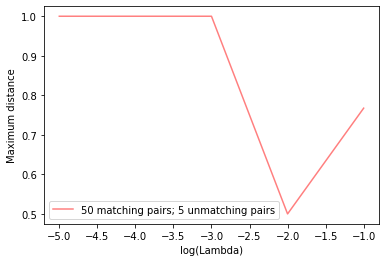

In [237]:
y_55 = np.array([np.max(S_55-e1_55), np.max(S_55-e2_55), np.max(S_55-e3_55), np.max(S_55-e4_55), np.max(S_55-e5_55)])

x = np.array([-1,-2,-3,-4,-5])

plt.plot(x,y_55, label='50 matching pairs; 5 unmatching pairs', alpha=0.5, color='red')

plt.ylabel('Maximum distance')
plt.xlabel('log(Lambda)')

plt.legend()
plt.show()